<a href="https://colab.research.google.com/github/gopireddy99/Named_Entity_Recognition/blob/main/Named_Entity_Recognition_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


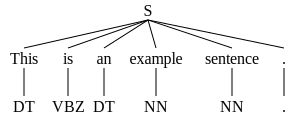

In [9]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
from nltk import ne_chunk
from nltk import word_tokenize

sent = "This is an example sentence."

ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary=False)

# Using Spacy

In [10]:
!pip install spacy


In [11]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is ready to launch new phone worth $10000 in New York tie square")
for ent in doc.ents:
  print(ent.text,ent.start_char,ent.end_char,ent.label_)

Apple 0 5 ORG
10000 42 47 MONEY
New York 51 59 GPE


# **Use case : Extarcting Entities from News Articles**

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [14]:
text = """
Elon Musk, the CEO of Spacex and Tesla, announced that spacex's starship will be launching its first crewed mission to Mars in 2007.
The mission which involves astronuts from NASA will be first of its kind , and it will takes palce at  the kenndey space center in Florida.
"""



In [18]:
doc = nlp(text)

for ent in doc.ents:
  print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: Elon Musk, Label: PERSON
Entity: Spacex, Label: GPE
Entity: Tesla, Label: ORG
Entity: first, Label: ORDINAL
Entity: Mars, Label: LOC
Entity: 2007, Label: DATE
Entity: NASA, Label: ORG
Entity: first, Label: ORDINAL
Entity: Florida, Label: GPE


# Visualization

In [20]:
from spacy import displacy
displacy.render(doc, style="ent")

In [23]:
import pandas as pd
entities = [(ent.text,ent.label_,ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities,columns=["Text","type","Lemma"])
df

,Text,type,Lemma
0,Elon Musk,PERSON,Elon Musk
1,Spacex,GPE,Spacex
2,Tesla,ORG,Tesla
3,first,ORDINAL,first
4,Mars,LOC,Mars
5,2007,DATE,2007
6,NASA,ORG,NASA
7,first,ORDINAL,first
8,Florida,GPE,Florida
